In [ ]:
# LINEAR AND LOGISTIC REGRESSION FOR BLACK FRIDAY DATASET¶
# ABSTRACT
# The aim of this assignment is to perform Linear and Logistic Regression for a chosen dataset and to build three models for the same

# For building any model, the first needs to be Data Preprocessing which consists of some common steps like importing the libraries, dataset, cleaning the data of any missing values, performing some Exploratory Data Analysis on the data to examine the estimators, etc. which is dealt with in the following steps.

# After data preprocessing is done, we can go ahead with building our models. In statistics, Linear Regression is a linear approach to model a relationship between a scalar response (dependent variable) and one or more explanatory variables (independent variables). If only one explanatory variable exists it is called Linear Regression. In case of multiple explanatory variables it is called Multiple Linear Regression.

# Linear Regression is performed on continuous values, therefore all the categorical variables need to be converted to numerical ones. This is dealt later in the assignment.

# In statistics, a logistic model uses a logistic function to model a binary dependent variable. It is a form of logistic regression.

# DATA PREPROCESSING
# Importing the Libraries

# Importing the dataset

# Getting rid of the missing values

# Performing Exploratory Data Analysis

# Dealing with Categorical Data (encoding text to number)

# Dealing with Dummy Variable Trap

# Splitting the data into Training set and Testing Set

# Feature Scaling

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn import metrics
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import statistics as st

In [3]:
df = pd.read_csv("Dataset.csv", decimal=",")

In [4]:
#A log file is a computer-generated data file that contains information about usage patterns, activities, and operations within an operating system, application, server or another device.
dflog = df

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [7]:
df.shape

(537577, 12)

In [9]:
df = df.drop_duplicates(keep='first')
df.shape

(537577, 12)

Text(0.5, 1.0, 'Purchase amount Distribution')

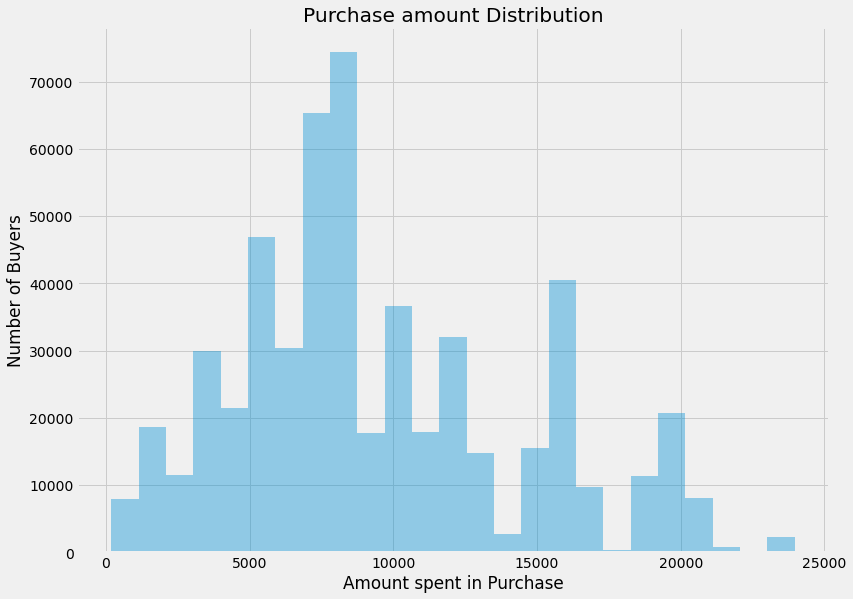

In [10]:
# The distribution of the target variable

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,9))
sns.distplot(df.Purchase, bins = 25, kde = False)
plt.xlabel('Amount spent in Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

In [92]:
#Gaussian distribution (also known as normal distribution) is a bell-shaped curve, and it is assumed that during any measurement values will follow a normal distribution with an equal number of measurements above and below the mean value.

#Above graph of purchase amount distribution has gausian distribution 

In [11]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


Text(0.5, 1.0, 'Correlation between features')

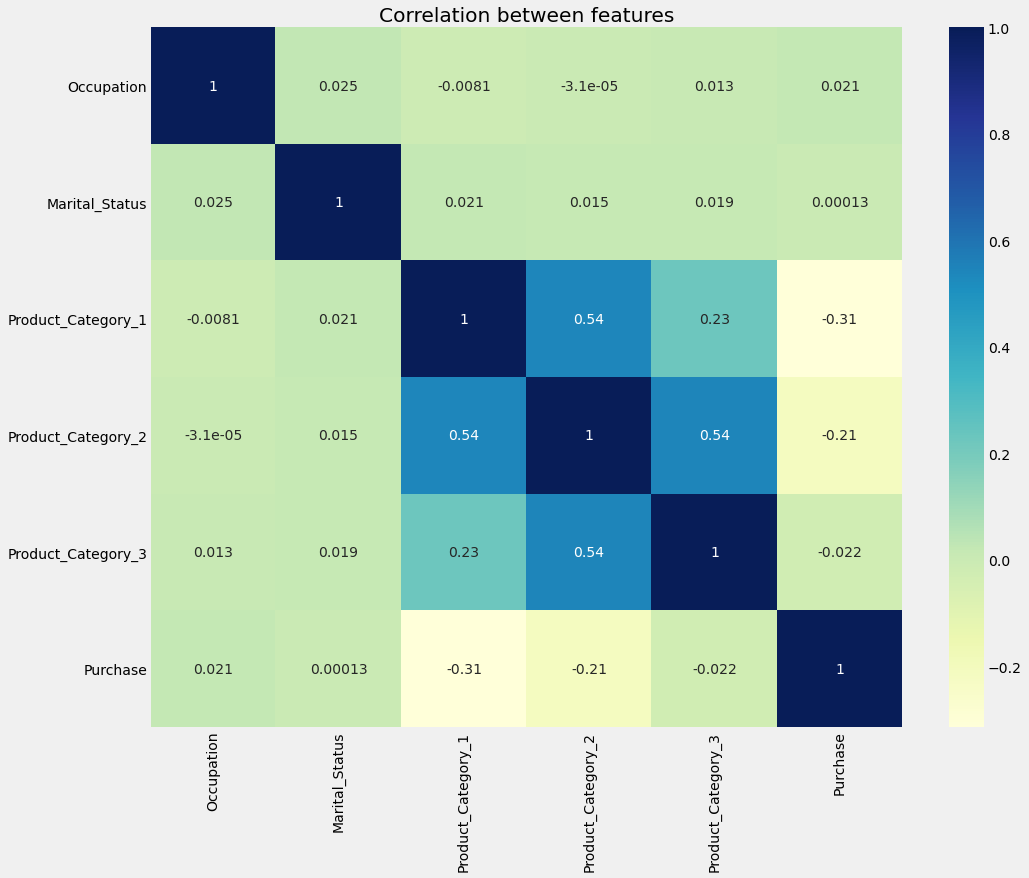

In [12]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df.drop("User_ID", axis=1).corr(), annot=True, cmap="YlGnBu").set_title("Correlation between features")

In [ ]:
#The Occupation variable seems to have the highest correlation with the Purchase. Product Category 1 seems to have the highest negative correlation with Purchase which is odd.

# From the heatmap above we can observe there are strong correlations between different types' products and purchase. There is also some correlation between age and marital status which is in line with common sense. Unfortunately, there is no single feature that shows strong correlation with purchase directly, so we can understand this as that purchase depends on the ensemble of all features.

In [ ]:
# PURCHASE AND OCCUPATION ANALYSIS
# Since occupation has the highest correlation with Purchase, let's plot the relationship between the two.

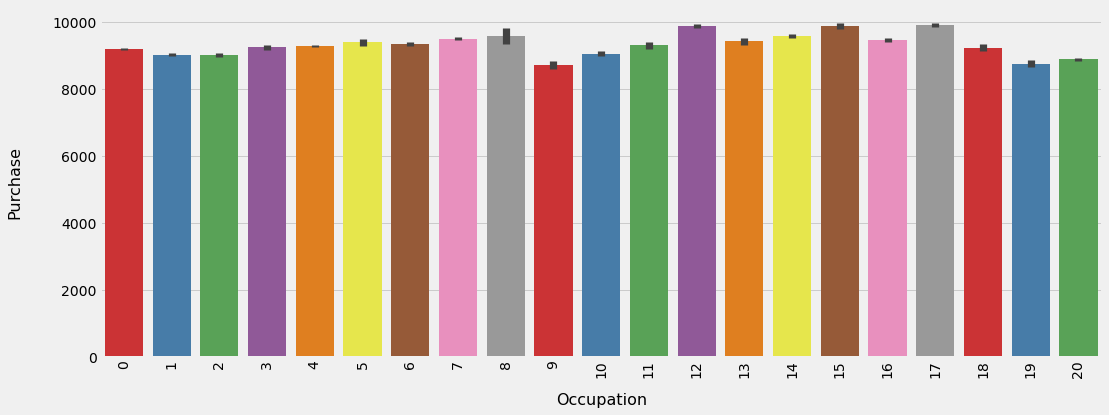

In [13]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Occupation', y='Purchase', data=df, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# After plotting the bar plots, we can infer that the Dependent Variable Purchase doesn't really show any substantial change with respect to the Occupation estimator.

In [14]:
# Checking for null values. We can say that two of the rows from the dataset have null values of which we need to get rid of.

# We can further say that, out of the 500000+ rows present in the data, the Product_Category_3 column consists of 75% of NaN values.
df.isnull().sum()[df.isnull().sum() != 0]

Product_Category_2    166986
Product_Category_3    373299
dtype: int64

In [ ]:
# SAMPLING THE DATA FOR MODELING
# The dataset is too huge therefore I have sampled the dataset and using 40000 values to perform the further analysis. Sampling randomly selects any 40000 values in any order without repeating them from the dataset .

# The User_ID and Product_ID colums are dropped because the value coming from these columns doesn't affect the purchase attribute.

In [15]:

df = df.drop(['Product_ID','User_ID'],axis = 1)
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
537572,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [16]:
df.shape

(537577, 10)

In [17]:
df = df.sample(n=40000,replace="False")

In [18]:
df.shape

(40000, 10)

In [19]:
df.isnull().values.any()

True

In [20]:
df.isnull().sum()[df.isnull().sum() != 0]

Product_Category_2    12428
Product_Category_3    27676
dtype: int64

In [104]:
#to check whee the NaN values are 
nan_values = df[df['Product_Category_2'].isnull()]

print (nan_values)

       Gender    Age  Occupation City_Category Stay_In_Current_City_Years  \
120655      F  26-35           2             B                          2   
118766      F  51-55           6             B                          3   
138735      F  26-35          14             B                         4+   
413217      M    55+          17             A                         4+   
101377      M  26-35           7             B                          3   
...       ...    ...         ...           ...                        ...   
439971      F  26-35          19             A                          0   
353507      M  26-35          20             C                          2   
324029      M  36-45           0             B                          3   
395079      M  26-35           0             A                          2   
370179      M  18-25           4             C                          3   

        Marital_Status  Product_Category_1  Product_Category_2  \
120655   

In [ ]:
# Missing Values in a dataset are not good. Therefore, we need to get rid of those. There are various methods to do that, which include:

# Replacing the NaNs by Mean
# Replacing the NaNs by Median
# Replacing the NaNs by zeros
# Deleting the row that contains the NaN values
# Amongst these 4 methods, the first one is most preferred. Deleting the rows containing NaNs is not recommended because that lead to the loss of data.
 
 # if you want to use imputer function then do this 
 #imputer = Imputer(missing_values='NaN',strategy = 'mean', axis = 0)
#imputer = imputer.fit(X[:,7:9])
#X[:,7:9] = imputer.transform(X[:,7:9])

In [22]:
replace_null_with_mean = df.mean()
df = df.fillna(replace_null_with_mean)
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
234724,M,18-25,5,C,0,0,3,4.000000,12.688251,10558
518308,M,18-25,4,A,3,0,5,8.000000,12.688251,8628
78846,F,46-50,6,C,4+,1,8,12.000000,12.688251,8135
337499,F,46-50,1,B,2,0,5,9.851589,12.688251,5170
67978,M,18-25,4,A,3,0,5,9.851589,12.688251,3645
...,...,...,...,...,...,...,...,...,...,...
278220,F,46-50,1,C,1,0,8,9.851589,12.688251,2206
260436,F,26-35,6,A,1,0,8,9.851589,12.688251,7908
1182,M,26-35,12,B,4+,1,5,9.851589,12.688251,6988
455056,M,26-35,16,A,2,1,16,9.851589,12.688251,16887


In [23]:
#check for null values after replacing NaN with mean value
df.isnull().values.any()

False

In [24]:
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

In [25]:
# declaring a dataframe
pd.DataFrame(df)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
234724,M,18-25,5,C,0,0,3,4.000000,12.688251,10558
518308,M,18-25,4,A,3,0,5,8.000000,12.688251,8628
78846,F,46-50,6,C,4+,1,8,12.000000,12.688251,8135
337499,F,46-50,1,B,2,0,5,9.851589,12.688251,5170
67978,M,18-25,4,A,3,0,5,9.851589,12.688251,3645
...,...,...,...,...,...,...,...,...,...,...
278220,F,46-50,1,C,1,0,8,9.851589,12.688251,2206
260436,F,26-35,6,A,1,0,8,9.851589,12.688251,7908
1182,M,26-35,12,B,4+,1,5,9.851589,12.688251,6988
455056,M,26-35,16,A,2,1,16,9.851589,12.688251,16887


In [ ]:
# The dataset needs to be split into Independent Variables Vector and Dependent Variable Vector, X and y respectively.

# Here, Purchase attribute is the Dependent Variable(y).

# All the other attributes are the Independent Cariables(X).

In [30]:
X = df.iloc[:,:-1].values
y = df.iloc[:,9].values

In [31]:
X

array([['M', '18-25', 5, ..., 3, 4.0, 12.688250567997404],
       ['M', '18-25', 4, ..., 5, 8.0, 12.688250567997404],
       ['F', '46-50', 6, ..., 8, 12.0, 12.688250567997404],
       ...,
       ['M', '26-35', 12, ..., 5, 9.851588568112579, 12.688250567997404],
       ['M', '26-35', 16, ..., 16, 9.851588568112579, 12.688250567997404],
       ['F', '26-35', 0, ..., 16, 9.851588568112579, 12.688250567997404]],
      dtype=object)

In [28]:
y

array([10558,  8628,  8135, ...,  6988, 16887, 20728], dtype=int64)

In [ ]:

# LINEAR REGRESSION
# We can see that the Independent set of variables have sets of categorical data. In Linear Regression, we need numerical data. In order to achieve that, we use the OneHotEncoder function to convert this categorical data into numerical data. This is done by giving each category it's own column and making it one if the row belongs to that particular category. This is called as setting up Dummy Variable.We have to build three Linear Regression Models. Depending on the correlation of each of the estimator with the Independent Variable, we can choose the independent variables. I'll be building Linear Regression Models for the following variables where the target variable is always 'Purchase': 1. X1 = Gender, Age, Occupation, City Category, Stay in Current City Years, Marital Status, Product Category 1, Product Category 2, Product Category 3 2. X2 = Gender, Age, Occupation, City Category, Stay in Current City Years, Marital Status, Product Category 1, Product Category 2 3. X3 =
# Dummy Variable Trap
# Including dummy variable in the regression model leads to the dummy variable trap.

In [32]:
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:,0])
X[:, 1] = labelencoder.fit_transform(X[:,1])
X[:, 2] = labelencoder.fit_transform(X[:, 2])
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X[:, 4] = labelencoder.fit_transform(X[:, 4])
X[:, 5] = labelencoder.fit_transform(X[:, 5])
X[:, 6] = labelencoder.fit_transform(X[:, 6])
X[:, 7] = labelencoder.fit_transform(X[:, 7])
X[:, 8] = labelencoder.fit_transform(X[:, 8])
# X[:, 9] = labelencoder.fit_transform(X[:, 9])
# X[:, 10] = labelencoder.fit_transform(X[:, 10])

In [34]:
df1 = pd.DataFrame(X)
df1

,0,1,2,3,4,5,6,7,8
0,1,1,5,2,0,0,2,2,9
1,1,1,4,0,3,0,4,6,9
2,0,4,6,2,4,1,7,11,9
3,0,4,1,1,2,0,4,8,9
4,1,1,4,0,3,0,4,8,9
...,...,...,...,...,...,...,...,...,...
39995,0,4,1,2,1,0,7,8,9
39996,0,2,6,0,1,0,7,8,9
39997,1,2,12,1,4,1,4,8,9
39998,1,2,16,0,2,1,15,8,9


In [35]:
df = pd.DataFrame(df1).apply(LabelEncoder().fit_transform)
df[9] = y
df

,0,1,2,3,4,5,6,7,8,9
0,1,1,5,2,0,0,2,2,9,10558
1,1,1,4,0,3,0,4,6,9,8628
2,0,4,6,2,4,1,7,11,9,8135
3,0,4,1,1,2,0,4,8,9,5170
4,1,1,4,0,3,0,4,8,9,3645
...,...,...,...,...,...,...,...,...,...,...
39995,0,4,1,2,1,0,7,8,9,2206
39996,0,2,6,0,1,0,7,8,9,7908
39997,1,2,12,1,4,1,4,8,9,6988
39998,1,2,16,0,2,1,15,8,9,16887


In [37]:
df.shape

(40000, 10)

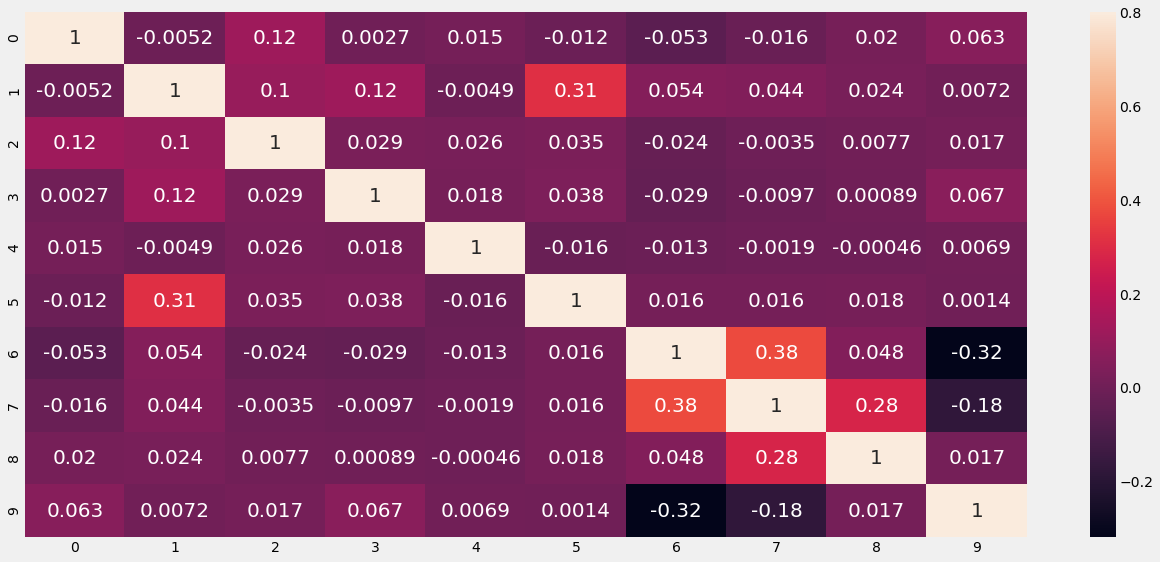

In [38]:
correlation = df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(correlation, vmax=.8,annot_kws={'size': 20}, annot=True);

In [39]:
# categorical_features='all' instead of categories='auto', drop=None, sparse=True (didnt work) 
onehotencoder = OneHotEncoder(categories='auto', drop=None, sparse=True)
X = onehotencoder.fit_transform(X).toarray()
X

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [40]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39996,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39997,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39998,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
cols = [0,2,9,30,33,38,40,60,78]
X = X.drop(X.columns[cols], axis=1)

In [44]:
X.shape

(40000, 74)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
pd.DataFrame(X)

,3,5,6,7,8,10,11,13,14,15,...,81,82,83,84,85,86,88,89,90,91
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [50]:
X_test

,3,5,6,7,8,10,11,13,14,15,...,81,82,83,84,85,86,88,89,90,91
12836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4214,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8198,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
31403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7416,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [51]:
y_train

array([ 6909,  8019, 12063, ...,  5968,  7924,  3444], dtype=int64)

In [52]:
y_test

array([ 7173, 16186,  2055, ...,  3972,  6935,  7952], dtype=int64)

In [55]:
regressor = LinearRegression()

In [57]:
result = regressor.fit(X_train, y_train)
print(result.intercept_)

10585.464861317856


In [58]:
print (result.coef_)

[-9.26187209e+01  6.25889306e+01 -4.41486872e+01  2.54957573e+02
 -1.46494828e+02 -3.24140592e+02 -2.32177405e+02  1.65632021e+02
  3.88567130e+01  5.98910430e+01  1.05602869e+02 -4.32618115e+02
  1.95523292e+02 -2.79358468e+01 -1.55160397e+01  1.69533261e+02
 -3.67353856e+01  9.55642159e+01  3.93409567e+02 -1.47703059e+02
  2.19118632e+02  1.21801067e+02 -5.80681911e+02 -3.57987767e+02
  1.91645928e+02  6.18029031e+02 -6.52832588e+01 -3.05404928e+00
  1.42124119e+01 -2.18868095e+02 -7.50979885e+02 -9.68564186e+03
 -3.83138267e+03  6.99253584e+03  3.28509871e+03  8.87605951e+03
 -5.29635963e+03 -7.81761887e+03 -1.02664587e+04  4.07511193e+03
  4.56631324e+03  5.63513359e+03  7.69975983e+02 -6.21335327e+03
  2.44855074e+03  1.46114030e+03  1.31925243e+03  1.25826358e+03
  1.57088967e+02  1.67309381e+03 -1.22818792e+02 -1.21453701e+03
  3.63085422e+03 -1.35377656e+03 -1.91090790e+03 -1.38179230e+03
  3.82219907e+02  7.54029051e+02 -6.45366241e+02  6.72040387e+02
  8.37949013e+02 -2.37811

In [ ]:
# import statsmodels.api as sm X = np.append(arr = np.ones([40000,1]).astype(int), values = X, axis = 1) X_opt = X[:,:] regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() regressor_OLS.summary()

In [60]:
pd.DataFrame(X)
X.shape

(40000, 74)

In [63]:
import statsmodels.api as sm
#import statsmodels.formula.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              3043.
Date:                Thu, 14 Jan 2021   Prob (F-statistic):                        0.00
Time:                        15:24:41   Log-Likelihood:                     -3.0848e+05
No. Observations:               32000   AIC:                                  6.171e+05
Df Residuals:                   31926   BIC:                                  6.177e+05
Df Model:                          74                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3            279.6372     65.218      4.288      0.000     151.808     407.466
5            432.8401     57.595      7.515      0.000     319.951     545.729
6            254.2430     81.642      3.114      0.002      94.222     414.265
7            552.1746     86.572      6.378      0.000     382.490     721.860
8            162.7526    118.416      1.374      0.169     -69.347     394.852
10           897.2298     88.018     10.194      0.000     724.712    1069.748
11          1070.3833    106.654     10.036      0.000     861.338    1279.429
13          1413.0566     82.592     17.109      0.000    1251.174    1574.939
14          1284.9499    148.473      8.654      0.000     993.937    1575.963
15          1094.7479    121.751      8.992      0.000     856.112    1333.384
16          1264.6279     81.211     15.572      0.000    1105.451    1423.805
17           701.7041    375.643      1.868      0.062     -34.571    1437.979
18          1276.5384    210.682      6.059      0.000     863.593    1689.483
19          1317.8296    147.281      8.948      0.000    1029.153    1606.506
20          1163.5738    153.607      7.575      0.000     862.498    1464.650
21          1369.6122     99.212     13.805      0.000    1175.152    1564.072
22           742.1153    198.450      3.740      0.000     353.145    1131.085
23          1368.3344    106.265     12.877      0.000    1160.051    1576.618
24          1609.4164    153.935     10.455      0.000    1307.698    1911.135
25           955.1202    109.389      8.731      0.000     740.714    1169.527
26          1406.0639     91.094     15.435      0.000    1227.516    1584.612
27          1368.7681    195.415      7.004      0.000     985.748    1751.788
28           603.4384    177.989      3.390      0.001     254.574     952.303
29           918.5884     97.474      9.424      0.000     727.536    1109.641
31           917.8547     50.930     18.022      0.000     818.029    1017.680
32          1338.6254     55.461     24.136      0.000    1229.919    1447.331
34           529.9618     50.378     10.520      0.000     431.219     628.705
36           548.5493     61.519      8.917      0.000     427.969     669.130
37           648.2164     64.479     10.053      0.000     521.835     774.598
41          2366.7527    117.121     20.208      0.000    2137.190    2596.315
42          4551.9918    128.520     35.419      0.000    4300.089    4803.895
43         -8945.1531    172.973    -51.714      0.000   -9284.187   -8606.119
44         -3196.6267     55.192    -57.918      0.000   -3304.806   -3088.448
46          7334.6431    258.831     28.338      0.000    6827.324    7841.962
48          3501.9727    837.569      4.181      0.000    186

In [64]:
y_pred = regressor.predict(X_test)

In [65]:
y_pred

array([ 8784.45395916, 14619.56184414,  1406.32136711, ...,
        9179.1282302 ,  5204.88740402, 11574.077394  ])

In [66]:
y_test

array([ 7173, 16186,  2055, ...,  3972,  6935,  7952], dtype=int64)

In [67]:
pd.DataFrame(y_pred,y_test)

,0
7173,8784.453959
16186,14619.561844
2055,1406.321367
8057,9299.420085
20530,13612.157179
...,...
5475,7968.022833
7769,9300.320627
3972,9179.128230
6935,5204.887404


In [68]:

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2646.8012224619692
11779398.763879275
3432.112871669473


In [ ]:
# MSE is more popular than MAE because MSE "punishes" larger errors. But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.


# LOGISTIC REGRESSION

In [69]:
min(y)

186

In [70]:
med = st.median(y)
y

array([10558,  8628,  8135, ...,  6988, 16887, 20728], dtype=int64)

In [71]:

z = pd.DataFrame(y)
z

,0
0,10558
1,8628
2,8135
3,5170
4,3645
...,...
39995,2206
39996,7908
39997,6988
39998,16887


In [72]:

med

8065.0

In [73]:
s = pd.Series(y)
a = s.where(s>med,1)

In [74]:
dependent = a.where(a<=med,0)
dependent

0        0
1        0
2        0
3        1
4        1
        ..
39995    1
39996    1
39997    1
39998    0
39999    0
Length: 40000, dtype: int64

In [75]:
pd.DataFrame(dependent)

,0
0,0
1,0
2,0
3,1
4,1
...,...
39995,1
39996,1
39997,1
39998,0


In [76]:
y = np.array(dependent)
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [78]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [81]:
y_pred = classifier.predict(X_test)

In [80]:
pd.DataFrame(y_test, y_pred)

,0
1,1
0,0
1,1
1,1
0,0
...,...
1,1
1,1
1,1
1,1


In [82]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[3058,  948],
       [ 836, 3158]], dtype=int64)

In [ ]:
# The values at index [0][0] and [1][1] are the correct predicted values i.e 2943+3554 = 6497 values are correctly predicted my the logistic regression model and the values at indices [0][1] and [1][0] are incorrectly predicted values i.e. 1045+458 = 1053 incorrectl predicted values.

# The logistic regression gives a good result.

In [83]:
pd.DataFrame(X)

,3,5,6,7,8,10,11,13,14,15,...,81,82,83,84,85,86,88,89,90,91
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [84]:
df2 = pd.DataFrame(X_train,y_train)
df2

,3,5,6,7,8,10,11,13,14,15,...,81,82,83,84,85,86,88,89,90,91
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [85]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,1
4,1
...,...
39995,1
39996,1
39997,1
39998,0


In [ ]:
# MULTICOLLINEARITY AND STEPWISE REGRESSION

In [86]:
multi_linreg = LinearRegression()

In [87]:
multi_linreg.fit(X,y)

LinearRegression()

In [88]:
r_square = multi_linreg.score(X,y)
r_square

0.36761737675864536

In [89]:
# VIF stands for Variance Inflation factor.
VIF = 1/(1-r_square)
VIF
# VIF value is less than 10. Investigation is not required.

1.5813211230795328

In [90]:
def vif_calc(input_data, dependent_col):
    import statsmodels.formula.api as smf
    x_vars = input_data.drop([dependent_col],axis = 1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = smf.ols(formula="y~x",data=x_vars).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvar_names[i], "VIF = ",vif)

In [91]:
vif_calc(input_data = df, dependent_col = 9)

0 VIF =  1.02
1 VIF =  1.14
2 VIF =  1.03
3 VIF =  1.02
4 VIF =  1.0
5 VIF =  1.11
6 VIF =  1.18
7 VIF =  1.27
8 VIF =  1.09


In [92]:
# VIF for each variable column is less than 5% therefore, there exists no multicollinearity between the variables.

In [93]:
# LOGISTIC REGRESSION

In [94]:
dflog

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [95]:
dflog = dflog.drop(['Product_ID','User_ID'],axis = 1)

In [96]:
dflog

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
537572,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [97]:
dflog.shape

(537577, 10)

In [98]:
ylog = dflog.iloc[:,0]
ylog

0         F
1         F
2         F
3         F
4         M
         ..
537572    M
537573    M
537574    M
537575    M
537576    M
Name: Gender, Length: 537577, dtype: object

In [99]:
ylog = pd.DataFrame(ylog).replace('M',0)

In [100]:
ylog = pd.DataFrame(ylog).replace('F',1)

In [101]:
ylog

,Gender
0,1
1,1
2,1
3,1
4,0
...,...
537572,0
537573,0
537574,0
537575,0


In [102]:
Xlog = dflog.drop(dflog.columns[0],axis = 1)
Xlog

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0-17,10,A,2,0,3,NaN,NaN,8370
1,0-17,10,A,2,0,1,6.0,14.0,15200
2,0-17,10,A,2,0,12,NaN,NaN,1422
3,0-17,10,A,2,0,12,14.0,NaN,1057
4,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...
537572,36-45,16,C,1,0,1,2.0,NaN,11664
537573,36-45,16,C,1,0,1,15.0,16.0,19196
537574,36-45,16,C,1,0,8,15.0,NaN,8043
537575,36-45,16,C,1,0,5,NaN,NaN,7172


In [103]:
Xlog = Xlog.replace(np.NaN,0)
Xlog

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0-17,10,A,2,0,3,0.0,0.0,8370
1,0-17,10,A,2,0,1,6.0,14.0,15200
2,0-17,10,A,2,0,12,0.0,0.0,1422
3,0-17,10,A,2,0,12,14.0,0.0,1057
4,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...
537572,36-45,16,C,1,0,1,2.0,0.0,11664
537573,36-45,16,C,1,0,1,15.0,16.0,19196
537574,36-45,16,C,1,0,8,15.0,0.0,8043
537575,36-45,16,C,1,0,5,0.0,0.0,7172


In [104]:

Xlog = Xlog.values

In [105]:
labelencoder = LabelEncoder()
Xlog[:, 0] = labelencoder.fit_transform(Xlog[:, 0])
Xlog[:, 1] = labelencoder.fit_transform(Xlog[:, 1])
Xlog[:, 2] = labelencoder.fit_transform(Xlog[:, 2])
Xlog[:, 3] = labelencoder.fit_transform(Xlog[:, 3])
Xlog[:, 4] = labelencoder.fit_transform(Xlog[:, 4])
Xlog[:, 5] = labelencoder.fit_transform(Xlog[:, 5])
Xlog[:, 6] = labelencoder.fit_transform(Xlog[:, 6])
Xlog[:, 7] = labelencoder.fit_transform(Xlog[:, 7])
#Xlog[:, 8] = labelencoder.fit_transform(Xlog[:, 8])

In [106]:
pd.DataFrame(Xlog)

,0,1,2,3,4,5,6,7,8
0,0,10,0,2,0,2,0,0,8370
1,0,10,0,2,0,0,5,11,15200
2,0,10,0,2,0,11,0,0,1422
3,0,10,0,2,0,11,13,0,1057
4,6,16,2,4,0,7,0,0,7969
...,...,...,...,...,...,...,...,...,...
537572,3,16,2,1,0,0,1,0,11664
537573,3,16,2,1,0,0,14,13,19196
537574,3,16,2,1,0,7,14,0,8043
537575,3,16,2,1,0,4,0,0,7172


In [108]:
onehotencoder = OneHotEncoder(categories='auto', drop=None, sparse=True)
Xlog[:,0:8] = onehotencoder.fit_transform(Xlog[:,0:8]).toarray()

ValueError: could not broadcast input array from shape (537577,90) into shape (537577,8)